# Import Libraries

In [11]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lib_file import lib_path
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE

for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

ImportError: bad magic number in 'lib_file': b'a\r\r\n'

# Data Loading

In [2]:
df = pd.read_csv("input/CICIDS2017.csv")

**Preliminary Analysis**

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,923,316,417.166667,231.080951,1.740123e+02,0.636630,1.592894e+06,4.597265e+06,16500000,3,113000000,2.406286e+06,5.491986e+06,16500000,3,113000000,4917177.522,7.084368e+06,16500000,3,1,0,0,0,1536,768,0.424420,0.212210,0,923,275.109589,233.833248,54677.98782,0,1,0,0,1,0,0,0,0,278.930556,201.416667,417.166667,1536,0,0,0,0,0,0,48,9668,24,10012,571,2079,23,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,1139,126,317.950000,208.261294,2.122254e+02,0.951762,1.060502e+06,3.813685e+06,16500000,2,113000000,1.693637e+06,4.719143e+06,16500000,2,113000000,2908399.744,5.922355e+06,16500000,3,1,0,0,0,2176,1280,0.599258,0.352505,0,1139,224.633027,198.999612,39600.84557,0,1,0,0,1,0,0,0,0,226.712963,167.117647,317.950000,2176,0,0,0,0,0,0,68,11364,40,12718,390,2081,39,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.250568,8.050035e+05,5.277837e+06,60100000,0,120000000,8.050035e+05,5.277837e+06,60100000,0,0,0.000,0.000000e+00,0,0,0,0,0,0,0,0,1.250568,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,150,0,0,0,-1,-1,0,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,1460,0,603.000000,653.594166,1.087088e+02,0.265508,4.017462e+06,1.550000e+07,60000000,1,60300000,7.532741e+06,2.120000e+07,60000000,311,211947,35324.500,2.750433e+04,57109,48,0,0,0,0,192,152,0.149348,0.116160,0,1460,385.352941,532.094087,283124.11760,0,0,0,1,0,0,0,0,0,409.437500,258.888889,603.000000,192,0,0,0,0,0,0,9,2330,7,4221,8192,513,8,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,161,161,161.000000,0.000000,1.576208e+06,14869.888480,8.966667e+01,1.483790e+02,261,4,4,4.000000e+00,0.000000e+00,4,4,4,4.000,0.000000e+00,4,4,0,0,0,0,64,64,7434.944238,7434.944238,51,161,95.000000,60.249481,3630.00000,0,0,0,0,0,0,0,0,1,118.750000,51.000000,161.000000,64,0,0,0,0,0,0,2,102,2,322,-1,-1,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
df.shape

(24689, 79)

In [5]:
df.columns.tolist()

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' P

In [6]:
processed_columns = [feature.strip() for feature in df.columns.tolist()]

In [7]:
df.columns = processed_columns
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,923,316,417.166667,231.080951,1.740123e+02,0.636630,1.592894e+06,4.597265e+06,16500000,3,113000000,2.406286e+06,5.491986e+06,16500000,3,113000000,4917177.522,7.084368e+06,16500000,3,1,0,0,0,1536,768,0.424420,0.212210,0,923,275.109589,233.833248,54677.98782,0,1,0,0,1,0,0,0,0,278.930556,201.416667,417.166667,1536,0,0,0,0,0,0,48,9668,24,10012,571,2079,23,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,1139,126,317.950000,208.261294,2.122254e+02,0.951762,1.060502e+06,3.813685e+06,16500000,2,113000000,1.693637e+06,4.719143e+06,16500000,2,113000000,2908399.744,5.922355e+06,16500000,3,1,0,0,0,2176,1280,0.599258,0.352505,0,1139,224.633027,198.999612,39600.84557,0,1,0,0,1,0,0,0,0,226.712963,167.117647,317.950000,2176,0,0,0,0,0,0,68,11364,40,12718,390,2081,39,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.250568,8.050035e+05,5.277837e+06,60100000,0,120000000,8.050035e+05,5.277837e+06,60100000,0,0,0.000,0.000000e+00,0,0,0,0,0,0,0,0,1.250568,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,150,0,0,0,-1,-1,0,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,1460,0,603.000000,653.594166,1.087088e+02,0.265508,4.017462e+06,1.550000e+07,60000000,1,60300000,7.532741e+06,2.120000e+07,60000000,311,211947,35324.500,2.750433e+04,57109,48,0,0,0,0,192,152,0.149348,0.116160,0,1460,385.352941,532.094087,283124.11760,0,0,0,1,0,0,0,0,0,409.437500,258.888889,603.000000,192,0,0,0,0,0,0,9,2330,7,4221,8192,513,8,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,161,161,161.000000,0.000000,1.576208e+06,14869.888480,8.966667e+01,1.483790e+02,261,4,4,4.000000e+00,0.000000e+00,4,4,4,4.000,0.000000e+00,4,4,0,0,0,0,64,64,7434.944238,7434.944238,51,161,95.000000,60.249481,3630.00000,0,0,0,0,0,0,0,0,1,118.750000,51.000000,161.000000,64,0,0,0,0,0,0,2,102,2,322,-1,-1,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


# Data Preprocessing

**NullValuesChecking**

In [8]:
for feature in df.columns:
    print(f"Feature: {feature:<30} | Number of Null Values: {df[feature].isnull().sum()}")

Feature: Destination Port               | Number of Null Values: 0
Feature: Flow Duration                  | Number of Null Values: 0
Feature: Total Fwd Packets              | Number of Null Values: 0
Feature: Total Backward Packets         | Number of Null Values: 0
Feature: Total Length of Fwd Packets    | Number of Null Values: 0
Feature: Total Length of Bwd Packets    | Number of Null Values: 0
Feature: Fwd Packet Length Max          | Number of Null Values: 0
Feature: Fwd Packet Length Min          | Number of Null Values: 0
Feature: Fwd Packet Length Mean         | Number of Null Values: 0
Feature: Fwd Packet Length Std          | Number of Null Values: 0
Feature: Bwd Packet Length Max          | Number of Null Values: 0
Feature: Bwd Packet Length Min          | Number of Null Values: 0
Feature: Bwd Packet Length Mean         | Number of Null Values: 0
Feature: Bwd Packet Length Std          | Number of Null Values: 0
Feature: Flow Bytes/s                   | Number of Null Value

In [9]:
for feature in df.columns.tolist():
    print('{:<30} -> {} infinity values'.format(feature, df[feature].isin([np.inf, -np.inf]).sum()),'\n')

Destination Port               -> 0 infinity values 

Flow Duration                  -> 0 infinity values 

Total Fwd Packets              -> 0 infinity values 

Total Backward Packets         -> 0 infinity values 

Total Length of Fwd Packets    -> 0 infinity values 

Total Length of Bwd Packets    -> 0 infinity values 

Fwd Packet Length Max          -> 0 infinity values 

Fwd Packet Length Min          -> 0 infinity values 

Fwd Packet Length Mean         -> 0 infinity values 

Fwd Packet Length Std          -> 0 infinity values 

Bwd Packet Length Max          -> 0 infinity values 

Bwd Packet Length Min          -> 0 infinity values 

Bwd Packet Length Mean         -> 0 infinity values 

Bwd Packet Length Std          -> 0 infinity values 

Flow Bytes/s                   -> 10 infinity values 

Flow Packets/s                 -> 10 infinity values 

Flow IAT Mean                  -> 0 infinity values 

Flow IAT Std                   -> 0 infinity values 

Flow IAT Max              

In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [11]:
df['Label'].value_counts()

BENIGN         5117
PortScan       5041
DDoS           5000
DoS            5000
Brute Force    4521
Name: Label, dtype: int64

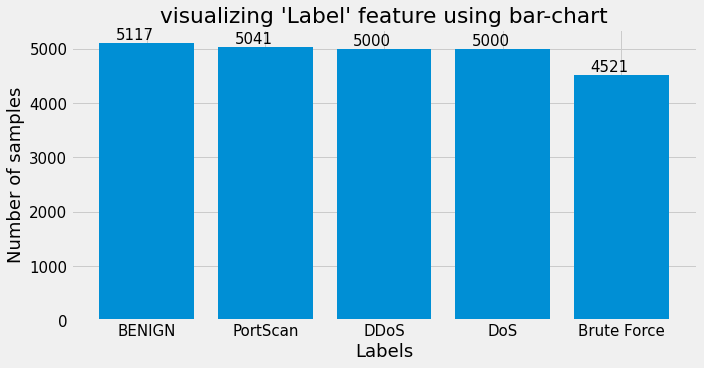

In [12]:
chart_df = dict(df['Label'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = 15
    barchart_object = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="visualizing 'Label' feature using bar-chart")
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of samples')
    for bar, count in zip(barchart_object, list(chart_df.values())):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.1,
            y=bar.get_height() + 0.1,
            s=str(count),
            ha='center',
            va='bottom'
        )
    plt.show()

In [13]:
oversample = SMOTE()

X_smote, y_smote = oversample.fit_resample(df.drop(labels='Label', axis=1), df['Label'].values)

df = pd.DataFrame(data=X_smote,columns=df.drop(labels='Label', axis=1).columns)
df['Label']=y_smote

In [14]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,923,316,417.166667,231.080951,1.740123e+02,0.636630,1.592894e+06,4.597265e+06,16500000,3,113000000,2.406286e+06,5.491986e+06,16500000,3,113000000,4917177.522,7.084368e+06,16500000,3,1,0,0,0,1536,768,0.424420,0.212210,0,923,275.109589,233.833248,54677.98782,0,1,0,0,1,0,0,0,0,278.930556,201.416667,417.166667,1536,0,0,0,0,0,0,48,9668,24,10012,571,2079,23,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,1139,126,317.950000,208.261294,2.122254e+02,0.951762,1.060502e+06,3.813685e+06,16500000,2,113000000,1.693637e+06,4.719143e+06,16500000,2,113000000,2908399.744,5.922355e+06,16500000,3,1,0,0,0,2176,1280,0.599258,0.352505,0,1139,224.633027,198.999612,39600.84557,0,1,0,0,1,0,0,0,0,226.712963,167.117647,317.950000,2176,0,0,0,0,0,0,68,11364,40,12718,390,2081,39,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.250568,8.050035e+05,5.277837e+06,60100000,0,120000000,8.050035e+05,5.277837e+06,60100000,0,0,0.000,0.000000e+00,0,0,0,0,0,0,0,0,1.250568,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,150,0,0,0,-1,-1,0,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,1460,0,603.000000,653.594166,1.087088e+02,0.265508,4.017462e+06,1.550000e+07,60000000,1,60300000,7.532741e+06,2.120000e+07,60000000,311,211947,35324.500,2.750433e+04,57109,48,0,0,0,0,192,152,0.149348,0.116160,0,1460,385.352941,532.094087,283124.11760,0,0,0,1,0,0,0,0,0,409.437500,258.888889,603.000000,192,0,0,0,0,0,0,9,2330,7,4221,8192,513,8,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,161,161,161.000000,0.000000,1.576208e+06,14869.888480,8.966667e+01,1.483790e+02,261,4,4,4.000000e+00,0.000000e+00,4,4,4,4.000,0.000000e+00,4,4,0,0,0,0,64,64,7434.944238,7434.944238,51,161,95.000000,60.249481,3630.00000,0,0,0,0,0,0,0,0,1,118.750000,51.000000,161.000000,64,0,0,0,0,0,0,2,102,2,322,-1,-1,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


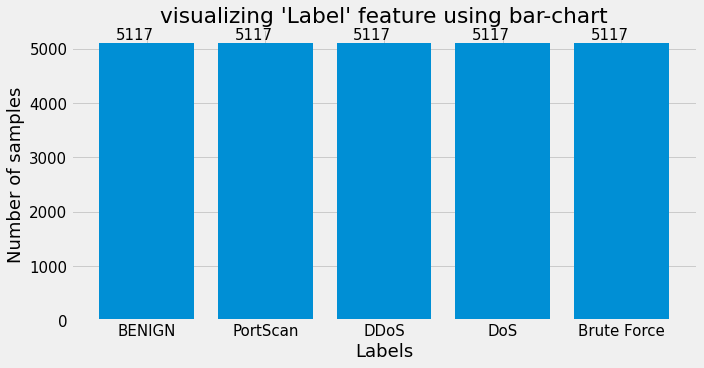

In [15]:
chart_df = dict(df['Label'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = 15
    barchart_object = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="visualizing 'Label' feature using bar-chart")
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of samples')
    for bar, count in zip(barchart_object, list(chart_df.values())):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.1,
            y=bar.get_height() + 0.1,
            s=str(count),
            ha='center',
            va='bottom'
        )
    plt.show()

In [16]:
class_labels = df['Label'].unique().tolist()
class_labels.sort()

print(class_labels)

['BENIGN', 'Brute Force', 'DDoS', 'DoS', 'PortScan']


In [17]:
class_dict={}
for idx, label in enumerate(class_labels):
    class_dict[label] = idx
print(class_dict)

{'BENIGN': 0, 'Brute Force': 1, 'DDoS': 2, 'DoS': 3, 'PortScan': 4}


In [18]:
df['Label'] = df['Label'].map(class_dict)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,923,316,417.166667,231.080951,1.740123e+02,0.636630,1.592894e+06,4.597265e+06,16500000,3,113000000,2.406286e+06,5.491986e+06,16500000,3,113000000,4917177.522,7.084368e+06,16500000,3,1,0,0,0,1536,768,0.424420,0.212210,0,923,275.109589,233.833248,54677.98782,0,1,0,0,1,0,0,0,0,278.930556,201.416667,417.166667,1536,0,0,0,0,0,0,48,9668,24,10012,571,2079,23,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,0
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,1139,126,317.950000,208.261294,2.122254e+02,0.951762,1.060502e+06,3.813685e+06,16500000,2,113000000,1.693637e+06,4.719143e+06,16500000,2,113000000,2908399.744,5.922355e+06,16500000,3,1,0,0,0,2176,1280,0.599258,0.352505,0,1139,224.633027,198.999612,39600.84557,0,1,0,0,1,0,0,0,0,226.712963,167.117647,317.950000,2176,0,0,0,0,0,0,68,11364,40,12718,390,2081,39,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,0
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.250568,8.050035e+05,5.277837e+06,60100000,0,120000000,8.050035e+05,5.277837e+06,60100000,0,0,0.000,0.000000e+00,0,0,0,0,0,0,0,0,1.250568,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,150,0,0,0,-1,-1,0,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,0
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,1460,0,603.000000,653.594166,1.087088e+02,0.265508,4.017462e+06,1.550000e+07,60000000,1,60300000,7.532741e+06,2.120000e+07,60000000,311,211947,35324.500,2.750433e+04,57109,48,0,0,0,0,192,152,0.149348,0.116160,0,1460,385.352941,532.094087,283124.11760,0,0,0,1,0,0,0,0,0,409.437500,258.888889,603.000000,192,0,0,0,0,0,0,9,2330,7,4221,8192,513,8,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,53,269,2,2,102,322,51,51,51.000000,0.000000,161,161,161.000000,0.000000,1.576208e+06,14869.888480,8.966667e+01,1.483790e+02,261,4,4,4.000000e+00,0.000000e+00,4,4,4,4.000,0.000000e+00,4,4,0,0,0,0,64,64,7434.944238,7434.944238,51,161,95.000000,60.249481,3630.00000,0,0,0,0,0,0,0,0,1,118.750000,51.000000,161.000000,64,0,0,0,0,0,0,2,102,2,322,-1,-1,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [19]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,185,2,2,102,224,51,51,51.000000,0.000000,112,112,112.00,0.000000,1.762162e+06,21621.621620,6.166667e+01,1.050777e+02,183,1,183,183.0,0.000000e+00,183,183,1,1.0000,0.000000e+00,1,1,0,0,0,0,40,40,10810.810810,10810.810810,51,112,75.400,33.411076,1.116300e+03,0,0,0,0,0,0,0,0,1,94.250000,51.000000,112.00,40,0,0,0,0,0,0,2,102,2,224,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,80,3267900,4,0,24,0,6,6,6.000000,0.000000,0,0,0.00,0.000000,7.344166e+00,1.224028,1.089300e+06,1.885856e+06,3266899,3,3267900,1089300.0,1.885856e+06,3266899,3,0,0.0000,0.000000e+00,0,0,0,0,0,0,80,0,1.224028,0.000000,6,6,6.000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.00,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,2
2,53,238,2,2,88,120,44,44,44.000000,0.000000,60,60,60.00,0.000000,8.739496e+05,16806.722690,7.933333e+01,9.664540e+01,188,3,47,47.0,0.000000e+00,47,47,3,3.0000,0.000000e+00,3,3,0,0,0,0,64,64,8403.361345,8403.361345,44,60,50.400,8.763561,7.680000e+01,0,0,0,0,0,0,0,0,1,63.000000,44.000000,60.00,64,0,0,0,0,0,0,2,88,2,120,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,80,5058590,3,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,0.790734,1.686197e+06,2.919814e+06,5057708,122,5058590,2529295.0,3.575716e+06,5057708,882,0,0.0000,0.000000e+00,0,0,0,0,0,0,104,40,0.593051,0.197684,0,0,0.000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.00,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.0,0,0,0.0,0.0,0,0,1
4,80,353306,3,6,26,11601,20,0,8.666667,10.263203,4380,0,1933.50,1757.789948,3.290915e+04,25.473669,4.416325e+04,1.136162e+05,324297,16,28573,14286.5,1.980111e+04,28288,285,353211,70642.2000,1.423304e+05,324297,16,0,0,0,0,72,132,8.491223,16.982446,0,4380,1162.700,1645.241762,2.706820e+06,0,0,0,1,0,0,0,0,2,1291.888889,8.666667,1933.50,72,0,0,0,0,0,0,3,26,6,11601,8192,229,2,20,0.0,0.0,0,0,0.0,0.0,0,0,2
5,59162,213,2,1,37,6,31,6,18.500000,17.677670,6,6,6.00,0.000000,2.018779e+05,14084.507040,1.065000e+02,1.279863e+02,197,16,213,213.0,0.000000e+00,213,213,0,0.0000,0.000000e+00,0,0,1,0,0,0,40,20,9389.671362,4694.835681,6,31,18.500,14.433757,2.083333e+02,0,1,0,0,1,0,0,0,0,24.666667,18.500000,6.00,40,0,0,0,0,0,0,2,37,1,6,30016,0,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
6,80,63080405,7,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,0.110969,1.050000e+07,1.190000e+07,32000000,996795,63100000,10500000.0,1.190000e+07,32000000,996795,0,0.0000,0.000000e+00,0,0,0,0,0,0,280,0,0.110969,0.000000,0,0,0.000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.00,280,0,0,0,0,0,0,7,0,0,0,29200,-1,0,40,7008717.0,0.0,7008717,7008717,18700000.0,12200000.0,32000000,8008018,3
7,22,655,2,1,8,2,6,2,4.000000,2.828427,2,2,2.00,0.000000,1.526718e+0

In [21]:
target_feature = 'Label'
all_features = df.columns.tolist()
all_features.remove(target_feature)
corr = df[all_features].corrwith(df[target_feature])

In [22]:
corr_df = pd.DataFrame(corr).reset_index()
corr_df.columns = ['Features', 'Importance']
corr_df.head(10)

,Features,Importance
0,Destination Port,0.115548
1,Flow Duration,0.098905
2,Total Fwd Packets,-0.060934
3,Total Backward Packets,-0.047183
4,Total Length of Fwd Packets,-0.096873
5,Total Length of Bwd Packets,-0.030242
6,Fwd Packet Length Max,-0.101786
7,Fwd Packet Length Min,0.010036
8,Fwd Packet Length Mean,-0.031164
9,Fwd Packet Length Std,-0.109086


In [23]:
corr_df.shape

(78, 2)

In [24]:
corr_df = corr_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
corr_df = corr_df.dropna()
corr_df = corr_df.loc[corr_df['Importance'] >= 0]
corr_df

,Features,Importance
0,PSH Flag Count,0.427788
1,Active Mean,0.225814
2,Active Min,0.222097
3,Active Max,0.208494
4,Flow IAT Mean,0.166429
5,Idle Std,0.161502
6,Idle Max,0.158175
7,Bwd Packets/s,0.148063
8,Fwd IAT Std,0.136079
9,Fwd IAT Max,0.134338


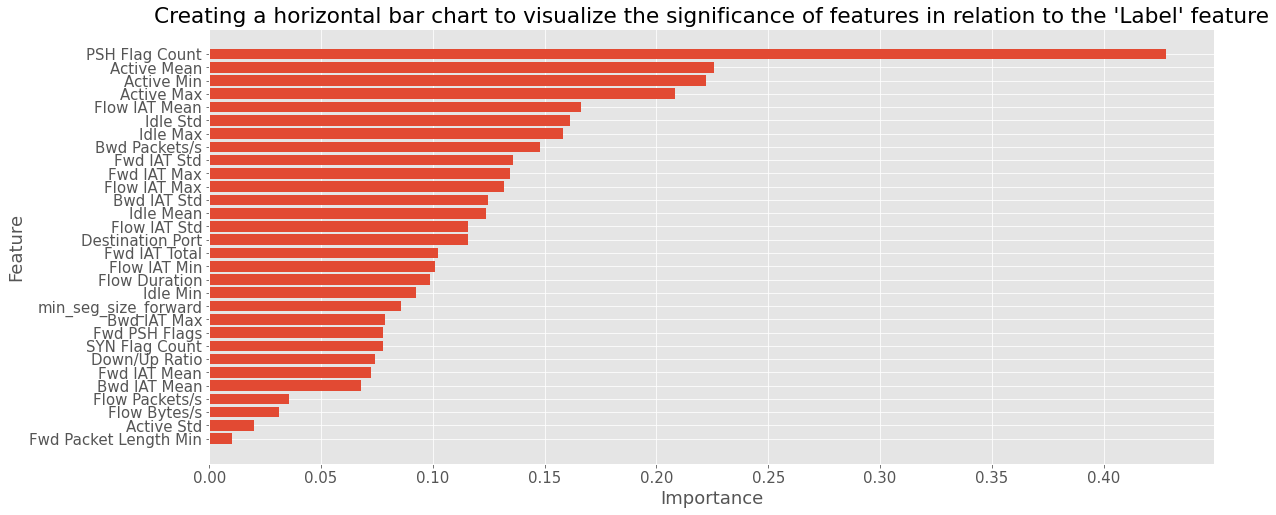

In [25]:
chart_corr_df = corr_df.sort_values(by='Importance').reset_index(drop=True)
chart_labels = chart_corr_df['Features'].values
chart_data = chart_corr_df['Importance'].values

with plt.style.context(style="ggplot"):
    plt.figure(figsize=(18,8))
    plt.rcParams['font.size'] = 15
    plt.barh(
        width=chart_data,
        y=chart_labels
    )
    plt.title(label="Creating a horizontal bar chart to visualize the significance of features in relation to the 'Label' feature")
    plt.xlabel(xlabel='Importance')
    plt.ylabel(ylabel='Feature')
    plt.show()

In [26]:
with open(file="models/selected_features.pkl", mode="wb") as file:
    pickle.dump(obj=corr_df['Features'].values.tolist(), file=file)

In [27]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,185,2,2,102,224,51,51,51.000000,0.000000,112,112,112.0,0.000000,1.762162e+06,21621.621620,6.166667e+01,1.050777e+02,183,1,183,183.0,0.000000e+00,183,183,1,1.0,0.0000,1,1,0,0,0,0,40,40,10810.810810,10810.810810,51,112,75.4,33.411076,1116.300,0,0,0,0,0,0,0,0,1,94.250000,51.000000,112.0,40,0,0,0,0,0,0,2,102,2,224,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,80,3267900,4,0,24,0,6,6,6.000000,0.000000,0,0,0.0,0.000000,7.344166e+00,1.224028,1.089300e+06,1.885856e+06,3266899,3,3267900,1089300.0,1.885856e+06,3266899,3,0,0.0,0.0000,0,0,0,0,0,0,80,0,1.224028,0.000000,6,6,6.0,0.000000,0.000,0,0,0,0,1,0,0,0,0,7.500000,6.000000,0.0,80,0,0,0,0,0,0,4,24,0,0,256,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,2
2,53,238,2,2,88,120,44,44,44.000000,0.000000,60,60,60.0,0.000000,8.739496e+05,16806.722690,7.933333e+01,9.664540e+01,188,3,47,47.0,0.000000e+00,47,47,3,3.0,0.0000,3,3,0,0,0,0,64,64,8403.361345,8403.361345,44,60,50.4,8.763561,76.800,0,0,0,0,0,0,0,0,1,63.000000,44.000000,60.0,64,0,0,0,0,0,0,2,88,2,120,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,80,5058590,3,1,0,0,0,0,0.000000,0.000000,0,0,0.0,0.000000,0.000000e+00,0.790734,1.686197e+06,2.919814e+06,5057708,122,5058590,2529295.0,3.575716e+06,5057708,882,0,0.0,0.0000,0,0,0,0,0,0,104,40,0.593051,0.197684,0,0,0.0,0.000000,0.000,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.0,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.0,0,0,0.0,0.0,0,0,1
4,80,353306,3,6,26,11601,20,0,8.666667,10.263203,4380,0,1933.5,1757.789948,3.290915e+04,25.473669,4.416325e+04,1.136162e+05,324297,16,28573,14286.5,1.980111e+04,28288,285,353211,70642.2,142330.3747,324297,16,0,0,0,0,72,132,8.491223,16.982446,0,4380,1162.7,1645.241762,2706820.456,0,0,0,1,0,0,0,0,2,1291.888889,8.666667,1933.5,72,0,0,0,0,0,0,3,26,6,11601,8192,229,2,20,0.0,0.0,0,0,0.0,0.0,0,0,2


In [28]:
df.shape

(25585, 79)

In [29]:
df = df[corr_df['Features'].values.tolist() + ['Label']]
df.head()

,PSH Flag Count,Active Mean,Active Min,Active Max,Flow IAT Mean,Idle Std,Idle Max,Bwd Packets/s,Fwd IAT Std,Fwd IAT Max,Flow IAT Max,Bwd IAT Std,Idle Mean,Flow IAT Std,Destination Port,Fwd IAT Total,Flow IAT Min,Flow Duration,Idle Min,min_seg_size_forward,Bwd IAT Max,Fwd PSH Flags,SYN Flag Count,Down/Up Ratio,Fwd IAT Mean,Bwd IAT Mean,Flow Packets/s,Flow Bytes/s,Active Std,Fwd Packet Length Min,Label
0,0,0.0,0,0,6.166667e+01,0.0,0,10810.810810,0.000000e+00,183,183,0.0000,0.0,1.050777e+02,53,183,1,185,0,20,1,0,0,1,183.0,1.0,21621.621620,1.762162e+06,0.0,51,0
1,0,0.0,0,0,1.089300e+06,0.0,0,0.000000,1.885856e+06,3266899,3266899,0.0000,0.0,1.885856e+06,80,3267900,3,3267900,0,20,0,0,0,0,1089300.0,0.0,1.224028,7.344166e+00,0.0,6,2
2,0,0.0,0,0,7.933333e+01,0.0,0,8403.361345,0.000000e+00,47,188,0.0000,0.0,9.664540e+01,53,47,3,238,0,32,3,0,0,1,47.0,3.0,16806.722690,8.739496e+05,0.0,44,0
3,1,0.0,0,0,1.686197e+06,0.0,0,0.197684,3.575716e+06,5057708,5057708,0.0000,0.0,2.919814e+06,80,5058590,122,5058590,0,32,0,0,0,0,2529295.0,0.0,0.790734,0.000000e+00,0.0,0,1
4,1,0.0,0,0,4.416325e+04,0.0,0,16.982446,1.980111e+04,28288,324297,142330.3747,0.0,1.136162e+05,80,28573,16,353306,0,20,324297,0,0,2,14286.5,70642.2,25.473669,3.290915e+04,0.0,0,2


In [30]:
df.shape

(25585, 31)

In [31]:
X=df.drop(labels='Label',axis=1)
X.head()

,PSH Flag Count,Active Mean,Active Min,Active Max,Flow IAT Mean,Idle Std,Idle Max,Bwd Packets/s,Fwd IAT Std,Fwd IAT Max,Flow IAT Max,Bwd IAT Std,Idle Mean,Flow IAT Std,Destination Port,Fwd IAT Total,Flow IAT Min,Flow Duration,Idle Min,min_seg_size_forward,Bwd IAT Max,Fwd PSH Flags,SYN Flag Count,Down/Up Ratio,Fwd IAT Mean,Bwd IAT Mean,Flow Packets/s,Flow Bytes/s,Active Std,Fwd Packet Length Min
0,0,0.0,0,0,6.166667e+01,0.0,0,10810.810810,0.000000e+00,183,183,0.0000,0.0,1.050777e+02,53,183,1,185,0,20,1,0,0,1,183.0,1.0,21621.621620,1.762162e+06,0.0,51
1,0,0.0,0,0,1.089300e+06,0.0,0,0.000000,1.885856e+06,3266899,3266899,0.0000,0.0,1.885856e+06,80,3267900,3,3267900,0,20,0,0,0,0,1089300.0,0.0,1.224028,7.344166e+00,0.0,6
2,0,0.0,0,0,7.933333e+01,0.0,0,8403.361345,0.000000e+00,47,188,0.0000,0.0,9.664540e+01,53,47,3,238,0,32,3,0,0,1,47.0,3.0,16806.722690,8.739496e+05,0.0,44
3,1,0.0,0,0,1.686197e+06,0.0,0,0.197684,3.575716e+06,5057708,5057708,0.0000,0.0,2.919814e+06,80,5058590,122,5058590,0,32,0,0,0,0,2529295.0,0.0,0.790734,0.000000e+00,0.0,0
4,1,0.0,0,0,4.416325e+04,0.0,0,16.982446,1.980111e+04,28288,324297,142330.3747,0.0,1.136162e+05,80,28573,16,353306,0,20,324297,0,0,2,14286.5,70642.2,25.473669,3.290915e+04,0.0,0


In [32]:
y=df[['Label']]
y.head()

,Label
0,0
1,2
2,0
3,1
4,2


# Data Normalization

In [33]:
scaler = MinMaxScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(data=scaled_X,columns=X.columns)
df['Label'] = y.values.ravel()
df.head()

,PSH Flag Count,Active Mean,Active Min,Active Max,Flow IAT Mean,Idle Std,Idle Max,Bwd Packets/s,Fwd IAT Std,Fwd IAT Max,Flow IAT Max,Bwd IAT Std,Idle Mean,Flow IAT Std,Destination Port,Fwd IAT Total,Flow IAT Min,Flow Duration,Idle Min,min_seg_size_forward,Bwd IAT Max,Fwd PSH Flags,SYN Flag Count,Down/Up Ratio,Fwd IAT Mean,Bwd IAT Mean,Flow Packets/s,Flow Bytes/s,Active Std,Fwd Packet Length Min,Label
0,0.0,0.0,0.0,0.0,6.116667e-07,0.0,0.0,8.108108e-03,0.000000,1.537815e-06,0.000002,0.000000,0.0,0.000002,0.000811,1.525000e-06,2.000000e-08,0.000002,0.0,0.454545,8.403361e-09,0.0,0.0,0.2,1.537815e-06,8.403361e-09,7.207201e-03,8.899809e-04,0.0,0.025719,0
1,0.0,0.0,0.0,0.0,1.089300e-02,0.0,0.0,0.000000e+00,0.022667,2.745293e-02,0.027453,0.000000,0.0,0.027531,0.001223,2.723250e-02,4.000000e-08,0.027234,0.0,0.454545,0.000000e+00,0.0,0.0,0.0,9.153782e-03,0.000000e+00,4.013517e-07,3.709175e-09,0.0,0.003026,2
2,0.0,0.0,0.0,0.0,7.883333e-07,0.0,0.0,6.302521e-03,0.000000,3.949580e-07,0.000002,0.000000,0.0,0.000001,0.000811,3.916667e-07,4.000000e-08,0.000002,0.0,0.727273,2.521008e-08,0.0,0.0,0.2,3.949580e-07,2.521008e-08,5.602234e-03,4.413887e-04,0.0,0.022189,0
3,1.0,0.0,0.0,0.0,1.686196e-02,0.0,0.0,1.482627e-07,0.042977,4.250175e-02,0.042502,0.000000,0.0,0.042625,0.001223,4.215492e-02,1.230000e-06,0.042156,0.0,0.727273,0.000000e+00,0.0,0.0,0.0,2.125458e-02,0.000000e+00,2.569205e-07,0.000000e+00,0.0,0.000000,1
4,1.0,0.0,0.0,0.0,4.416275e-04,0.0,0.0,1.273683e-05,0.000238,2.377143e-04,0.002725,0.001709,0.0,0.001659,0.001223,2.381083e-04,1.700000e-07,0.002944,0.0,0.454545,2.725185e-03,0.0,0.0,0.4,1.200546e-04,5.936319e-04,8.484565e-06,1.662078e-05,0.0,0.000000,2


In [34]:
with open(file='models/scaler.pkl',mode='wb') as file:
    pickle.dump(obj=scaler,file=file)

# Data Splitting

In [35]:
X = df.drop(labels='Label', axis=1)
y = df[['Label']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20468, 30) (5117, 30) (20468, 1) (5117, 1)


# Saving the splitted data

In [36]:
X_train.to_csv('splitted_data/X_train.csv',index=False)
X_test.to_csv('splitted_data/X_test.csv',index=False)
y_train.to_csv('splitted_data/y_train.csv',index=False)
y_test.to_csv('splitted_data/y_test.csv',index=False)

---